# Colab 設定

In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-06-19 06:34:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.153.139, 142.250.153.100, 142.250.153.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/csc58ipsd12slveo16sv3cehr9l9elpn/1624084425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-06-19 06:34:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/csc58ipsd12slveo16sv3cehr9l9elpn/1624084425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [2]:
#!pip install geopandas
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install pygeos
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 0s (5,072 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialo

In [88]:
import csv
import requests
import os
import pandas as pd
from urllib.parse import urlparse

import numpy as np
from numpy import zeros, newaxis
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

import datetime

import xml.etree.ElementTree as ET


import geopandas as gpd

from geopandas.tools import sjoin
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay


import scipy.stats as ss

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from numpy import save
from numpy import load



np.set_printoptions(suppress=True)
#myfont = FontProperties(fname=r'C:\Windows\Fonts\NotoSansCJKtc-Regular.otf')

In [5]:
print(os.getcwd())

/content


In [6]:
path = '/home'
os.chdir(path)

## 上傳所需的檔案


# 建立函數

In [11]:
#取得即時資料庫 M06A路徑原始資料
#儲存在該日期的資料夾中
#日期格式 20210611

def downloadFromWeb_M06A(day):
    #產生url的list
    paths_list = []

    for i in range(24):
        hour = str(i).zfill(2)

        path = 'https://tisvcloud.freeway.gov.tw/history/TDCS/M06A/' +  \
                day +'/' + hour + '/TDCS_M06A_' + day + '_' + hour + '0000.csv'
        print(path)
        paths_list.append(path)
    
    os.makedirs('M06A/' +day, exist_ok=True) 
    #os.mkdir(day)
        
    #開始下載
    for path in paths_list:
        a = urlparse(path)
        filename = os.path.basename(a.path)

        req = requests.get(path)
        url_content = req.content
        csv_file = open('M06A/' + day +'/' + filename, 'wb')

        csv_file.write(url_content)
        csv_file.close()


In [7]:
#將該資料夾內的csv  M06A  檔都轉換成df
#儲存在該日期的資料夾中
#日期格式 20210611
#事先解壓縮放到以日期為名的資料夾中

# VehicleType：	車種，31小客車、32小貨車、41大客車、42大貨車、5聯結車
# DetectionTime_O：	車輛通過本旅次第1個測站時間
# GantryID_O：	車輛通過本旅次第1個測站編號
# DetectionTime_D：	車輛通過本旅次最後1個測站時間
# GantryID_D：	車輛通過本旅次最後1個測站編號
# TripLength：	本旅次行駛距離
# TripEnd：	旅次標記(Y正常結束，N異常)
# TripInformation：	本旅次經過各個測站之通過時間及編號

def csvToDf_M06A( folderName ):
    filenames_list = []
    for path, subdirs, files in os.walk( folderName ):
        for name in files:
            #print(os.path.join(path, name))
            filename = os.path.join(path, name)
            filenames_list.append(filename)    

            
    #讀取資料
    travel_distance = []
    for filename in filenames_list:
        with open(filename, newline='') as f:
            reader = csv.reader(f)
            data = list(reader)
            for d in data :
                travel_distance.append(d)
    #list 轉 df
    columns_name = ['VehicleType','DetectionTime_O','GantryID_O','DetectionTime_D',
                    'GantryID_D','TripLength','TripEnd','TripInformation']
    df = pd.DataFrame (travel_distance,columns = columns_name )
    return df


# 使用 各旅次路徑原始資料繪圖

## 讀取 etags站資料

### 讀取E-tag xml
####  https://tisvcloud.freeway.gov.tw/history/motc20/ETag.xml

1. UpdateTime：	本平台資料更新時間(ISO8601格式:yyyy-MM-ddTHH:mm:sszzzz)
2. UpdateInterval：	本平台資料更新週期(秒)
3. AuthorityCode：	業管機關簡碼
4. ETagGantryID：	eTag偵測站代碼
5. LinkID：	基礎路段代碼, 請參閱[基礎路段代碼表]https://traffic-api-documentation.gitbook.io/traffic/xiang-dai-zhao-biao
6. LocationType：	設置地點位置類型 = ['1: 路側', '2: 道路中央分隔島', '3: 快慢分隔島', '4: 車道上門架', '5: 車道鋪面', '6: 其他']
7. PositionLon：	設備架設位置 X 坐標
8. PositionLat：	設備架設位置 Y 坐標
9. RoadID：	道路代碼, 請參閱[路名碼基本資料]https://traffic-api-documentation.gitbook.io/traffic/xiang-dai-zhao-biao
10. RoadName：	道路名稱
11. RoadClass：	道路分類 = ['0: 國道', '1: 快速道路', '2: 市區快速道路', '3: 省道', '4: 縣道', '5: 鄉道', '6: 市區一般道路', '7: 匝道']
12. RoadDirection：	基礎路段所屬道路方向, 請參閱[道路方向資料表]https://traffic-api-documentation.gitbook.io/traffic/xiang-dai-zhao-biao
13. Start：	路段起點描述
14. End：	路段迄點描述
15. LocationMile：	所在方向里程數

In [8]:
# 讀取etags xml，存入df_etags 。用來解析龍門架的位置

#從檔案載入並解析 XML 資料
tree = ET.parse('eTag 靜態資訊/ETag.xml')
root = tree.getroot()

etags_list = []
for idx , child in enumerate(root[3]):
    print(idx)
    etag = []
    for idx_2, child_2 in enumerate(child) :
        #print(child_2.tag)
        #print(child_2.attrib)
        if idx_2 == 9:
            for child_3 in child_2:
                print(child_3.text)
                etag.append(child_3.text)
        else:
            print(child_2.text)
            etag.append(child_2.text)
    etags_list.append(etag)
    print('****')
    
#存入df_etags
etag_columns = ['ETagGantryID','LinkID','LocationType','PositionLon','PositionLat',
               'RoadID','RoadName','RoadClass','RoadDirection','Start','End','LocationMile',]

df_etags = pd.DataFrame (etags_list,columns = etag_columns )  

0
03F2899N
0000300129000Q
4
120.48633
23.511683
000030
國道3號
0
N
竹崎(159縣道)
竹崎(竹崎連絡道)
289K+900
****
1
05F0000S
0000501001000A
4
121.62302
25.035183
000050
國道5號
0
S
南港系統(連接國3)
石碇
0K+000
****
2
03F2306N
0000300123000M
4
120.70283
23.90678
000030
國道3號
0
N
南投服務區
南投
230K+600
****
3
01F3227N
0000100132300D
4
120.25
23.014172
000010
國道1號
0
N
大灣
永康
322K+700
****
4
03F1991S
0000300019900N
4
120.57766
24.102808
000030
國道3號
0
S
彰化系統(連接國1)
快官(連接台74)
199K+100
****
5
03F2415N
0000300124100M
4
120.700005
23.814837
000030
國道3號
0
N
竹山
名間
241K+500
****
6
03F2306S
0000300023000M
4
120.70283
23.90678
000030
國道3號
0
S
南投
南投服務區
230K+600
****
7
03F2415S
0000300024100M
4
120.700005
23.814837
000030
國道3號
0
S
名間
竹山
241K+500
****
8
01F3227S
0000100032300D
4
120.25
23.014172
000010
國道1號
0
S
永康
大灣
322K+700
****
9
03F0846N
0000300108400J
4
121.126
24.79144
000030
國道3號
0
N
竹林
關西
84K+600
****
10
03F0006S
0000300000070C
4
121.70891
25.137106
000030
國道3號
0
S
基金
瑪東系統(連接台62)
0K+600
****
11
03F0846S
0000300008400J
4
121.126


## 檢查etags位在哪個縣市

In [9]:
#載入各縣市shp file
shpFile = '直轄市、縣市界線(TWD97經緯度)/COUNTY_MOI_1090820.shp'
gdf = gpd.read_file(shpFile)


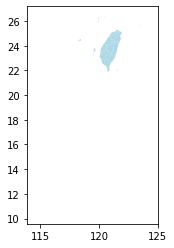

In [10]:
gdf.plot(color='lightblue')

In [11]:
#把座標轉換成 float
df_etags["PositionLon"] = pd.to_numeric(df_etags["PositionLon"], downcast="float")
df_etags["PositionLat"] = pd.to_numeric(df_etags["PositionLat"], downcast="float")


In [12]:
len(df_etags['ETagGantryID'])

335

In [13]:
for x, y in zip( df_etags['PositionLon'] , df_etags['PositionLat']) :
                 print(x,y)

120.486328125 23.511682510375977
121.62301635742188 25.03518295288086
120.70282745361328 23.906780242919922
120.25 23.014171600341797
120.5776596069336 24.102807998657227
120.70000457763672 23.814836502075195
120.70282745361328 23.906780242919922
120.70000457763672 23.814836502075195
120.25 23.014171600341797
121.1259994506836 24.791439056396484
121.70890808105469 25.13710594177246
121.1259994506836 24.791439056396484
120.486328125 23.511682510375977
121.26619720458984 25.012943267822266
120.99886322021484 24.763586044311523
120.56813049316406 24.113571166992188
121.11173248291016 24.893436431884766
121.11173248291016 24.893436431884766
121.26619720458984 25.012943267822266
121.55501556396484 25.072261810302734
121.64347076416016 25.065610885620117
120.57295227050781 23.649141311645508
121.5860366821289 25.003864288330078
120.62590026855469 23.77558135986328
120.53250885009766 23.606792449951172
121.5577392578125 25.072750091552734
120.33662414550781 22.619115829467773
121.595977783203

In [14]:
#將門架位置轉成 geoDataframe
etags_pointdf = GeoDataFrame([
    {'geometry': Point(x, y), 'ETagGantryID': etagId  }
    for x, y, etagId in zip( df_etags['PositionLon'] , df_etags['PositionLat'], df_etags['ETagGantryID'] ) ])


In [15]:
etags_pointdf.iloc[2]

geometry        POINT (120.7028274536133 23.90678024291992)
ETagGantryID                                       03F2306N
Name: 2, dtype: object

In [16]:
# 門架位置的df和縣市shp用同樣的座標系統
etags_pointdf.crs = gdf.crs

#合併兩df--->將etags龍門架對應的縣市找出來
etags_with_city_df = sjoin(etags_pointdf, gdf, how="left")

In [17]:
etags_with_city_df

,geometry,ETagGantryID,index_right,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG
0,POINT (120.48633 23.51168),03F2899N,13,Q,10010,嘉義縣,Chiayi County
1,POINT (121.62302 25.03518),05F0000S,6,A,63000,臺北市,Taipei City
2,POINT (120.70283 23.90678),03F2306N,3,M,10008,南投縣,Nantou County
3,POINT (120.25000 23.01417),01F3227N,9,D,67000,臺南市,Tainan City
4,POINT (120.57766 24.10281),03F1991S,2,N,10007,彰化縣,Changhua County
...,...,...,...,...,...,...,...
330,POINT (120.32219 23.34747),01F2827S,9,D,67000,臺南市,Tainan City
331,POINT (120.47491 23.70260),01F2394N,4,P,10009,雲林縣,Yunlin County
332,POINT (120.76442 24.57964),03F1332N,11,K,10005,苗栗縣,Miaoli County
333,POINT (121.78946 24.71068),05F0439S,1,G,10002,宜蘭縣,Yilan County


In [23]:
#輸入門架ID，輸出縣市
def etagInWhichCity( gantryId):
    for idx, etag in etags_with_city_df.iterrows():
        if gantryId == etag['ETagGantryID']:
            return etag['COUNTYNAME']
            break          
    


In [24]:
test = etagInWhichCity('03F2899N')
print(test)

嘉義縣


In [ ]:
## 計算出入縣市的矩陣
def countIOcarNum(carIn, carOut):
    if carIn != None:
        i = cityName_list.index(carIn)
    if carOut!= None:
        j = cityName_list.index(carOut)
    if carIn!= None  and  carOut!= None:
        trip_array[i][j] += 1

## 下載原始路徑資料與讀取
### https://tisvcloud.freeway.gov.tw/history/TDCS/M06A/20210613/23/TDCS_M06A_20210613_230000.csv

1. VehicleType：	車種，31小客車、32小貨車、41大客車、42大貨車、5聯結車
2. DetectionTime_O：	車輛通過本旅次第1個測站時間
3. GantryID_O：	車輛通過本旅次第1個測站編號
4. DetectionTime_D：	車輛通過本旅次最後1個測站時間
5. GantryID_D：	車輛通過本旅次最後1個測站編號
6. TripLength：	本旅次行駛距離
7. TripEnd：	旅次標記(Y正常結束，N異常)
8. TripInformation：	本旅次經過各個測站之通過時間及編號

In [ ]:
# 下載資料
day = '20210611'
downloadFromWeb_M06A(day)

In [18]:
df = csvToDf_M06A('M06A')
print(df)

        VehicleType  ...                                    TripInformation
0                31  ...  2021-06-11 20:32:10+03F1215S; 2021-06-11 20:34...
1                31  ...  2021-06-11 20:25:38+03F3259S; 2021-06-11 20:28...
2                31  ...  2021-06-11 20:53:40+03F1215S; 2021-06-11 20:56...
3                41  ...  2021-06-11 20:39:20+01F1802S; 2021-06-11 20:41...
4                31  ...  2021-06-11 20:35:14+01F3126S; 2021-06-11 20:39...
...             ...  ...                                                ...
3261420           5  ...  2021-06-11 06:44:54+01F0376N; 2021-06-11 06:47...
3261421          31  ...  2021-06-11 06:59:05+01F1699N; 2021-06-11 07:00...
3261422          31  ...  2021-06-11 06:31:14+01F2483S; 2021-06-11 06:32...
3261423           5  ...  2021-06-11 06:51:21+03F1161N; 2021-06-11 06:53...
3261424          32  ...  2021-06-11 06:22:07+01F0467N; 2021-06-11 06:25...

[3261425 rows x 8 columns]


In [19]:
df.columns

Index(['VehicleType', 'DetectionTime_O', 'GantryID_O', 'DetectionTime_D',
       'GantryID_D', 'TripLength', 'TripEnd', 'TripInformation'],
      dtype='object')

In [20]:
# TripLength  轉 float
df["TripLength"] = pd.to_numeric(df["TripLength"], downcast="float")

In [21]:
#從縣市 shp的資料庫取出縣市的list
cityName_list = list(gdf['COUNTYNAME'])
cityName_eng_list = list(gdf['COUNTYENG'])
print(cityName_list)
print(cityName_eng_list)

idex = cityName_list.index('新北市')
print(idex)

['連江縣', '宜蘭縣', '彰化縣', '南投縣', '雲林縣', '基隆市', '臺北市', '新北市', '臺中市', '臺南市', '桃園市', '苗栗縣', '嘉義市', '嘉義縣', '金門縣', '高雄市', '臺東縣', '花蓮縣', '澎湖縣', '新竹市', '新竹縣', '屏東縣']
['Lienchiang County', 'Yilan County', 'Changhua County', 'Nantou County', 'Yunlin County', 'Keelung City', 'Taipei City', 'New Taipei City', 'Taichung City', 'Tainan City', 'Taoyuan City', 'Miaoli County', 'Chiayi City', 'Chiayi County', 'Kinmen County', 'Kaohsiung City', 'Taitung County', 'Hualien County', 'Penghu County', 'Hsinchu City', 'Hsinchu County', 'Pingtung County']
7


In [22]:
gantryIdList = list(df_etags['ETagGantryID'])

## 將該車次出入門架紀錄在矩陣中
def countGantryNum(carIn, carOut):
    global trip_array
    i = None
    j = None

    if carIn != None:
        try:         
            i = gantryIdList.index(carIn)
        except ValueError:
            pass
    if carOut!= None:
        try:
            j = gantryIdList.index(carOut)
        except  ValueError:
            pass
    if carIn!= None  and  carOut!= None and i != None and j != None:
        trip_array[i][j] += 1

In [23]:
#輸入vehicletype，輸出計算的矩陣
def countVechicleInGantry(vehicletype):
    global trip_array

    #31小客車、32小貨車、41大客車、42大貨車、5聯結車
    vehicletype = str(vehicletype)
    cond1  = df['VehicleType'] == vehicletype

    print(len(df[cond1 ]))


    #製作計算各門架出入利用的零矩陣
    array_length = len(df_etags['ETagGantryID'])
    trip_array = np.zeros((array_length  , array_length ))

    #計算車種出入門架矩陣
    for idx,car in df[cond1].iterrows():
        countGantryNum( car['GantryID_O'] , car['GantryID_D'])
    #print(trip_array)    
    return trip_array

In [94]:
gantryArray = countVechicleInGantry(5)
print(gantryArray)
save('gantryArray5.npy', gantryArray)

202976
[[ 15.   0.   1. ...   0.   0.   0.]
 [  0.   1.   0. ...   0.   1.   0.]
 [  0.   0.  25. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  47.   0.   0.]
 [  0.   0.   0. ...   0.  67.   0.]
 [  0.   0.   0. ...   0.   0. 159.]]


In [95]:
gantryArray = load('gantryArray5.npy')


In [96]:
#沿axis = 0 ，前m大的
#沿axis = 1 ，前n大的
m = 10
n = 20

array = gantryArray.copy()

array1 = np.sum(array ,axis= 0) 
array1_argsort = np.argsort(array1)[-m:][::-1]

for i in range(m):

    gantryId = df_etags['ETagGantryID'][array1_argsort[i]]
    gantryName = df_etags['End'][array1_argsort[i]]
    num = array1[array1_argsort[i]]
    print(gantryId,'\t', gantryName,'\t',num )

    array2 = array[:,array1_argsort[i]]
    array2_argsort = np.argsort(array2)[-n:][::-1]

    print('*****')
    for j in range(n):
        gantryId = df_etags['ETagGantryID'][array2_argsort[j]]
        gantryName = df_etags['Start'][array2_argsort[j]]
        num = array2[array2_argsort[j]]
        print(gantryId,'\t', gantryName,'\t',num )
    print('*****')


01F3686S 	 瑞隆路南下出口匝道 	 7546.0
*****
01F3640S 	 鼎金系統(連接國10、大中路) 	 1263.0
01F3590S 	 楠梓(鳳楠路) 	 937.0
01F3686S 	 高雄(中正、三多路) 	 620.0
01F3525S 	 岡山 	 550.0
01F3676S 	 高雄(九如、建國路) 	 539.0
01F3460S 	 高科 	 502.0
01F3366S 	 仁德系統(連接台86) 	 322.0
01F3019S 	 下營系統(連接台84) 	 319.0
01F3227S 	 永康 	 291.0
01F3185S 	 台南系統(連接國8) 	 229.0
03F1944S 	 和美 	 185.0
01F3398S 	 路竹 	 174.0
01F3252S 	 大灣 	 148.0
01F3286S 	 仁德 	 82.0
01F3126S 	 安定 	 78.0
01F2930S 	 新營 	 76.0
01F2603S 	 民雄 	 75.0
01F3561S 	 楠梓(旗楠路) 	 71.0
01F3083S 	 麻豆 	 70.0
01F2674S 	 嘉義 	 62.0
*****
01F3736S 	 高雄端(新生路) 	 4696.0
*****
01F3736S 	 高雄端(中山四路) 	 1367.0
01F3590S 	 楠梓(鳳楠路) 	 469.0
01F3460S 	 高科 	 340.0
01F3640S 	 鼎金系統(連接國10、大中路) 	 334.0
01F3366S 	 仁德系統(連接台86) 	 317.0
01F3676S 	 高雄(九如、建國路) 	 266.0
01F3525S 	 岡山 	 206.0
01F3227S 	 永康 	 189.0
01F3185S 	 台南系統(連接國8) 	 154.0
01F3398S 	 路竹 	 110.0
01F3686S 	 高雄(中正、三多路) 	 92.0
01F3019S 	 下營系統(連接台84) 	 88.0
01F2930S 	 新營 	 64.0
01F2674S 	 嘉義 	 47.0
03F1944S 	 和美 	 46.0
01F3286S 	 仁德 	 41.0
03F3392S 	

### 以下測試區

In [ ]:
#31小客車、32小貨車、41大客車、42大貨車、5聯結車
cond1  = df['VehicleType'] == '5'

print(len(df[cond1 ]))

#製作計算各門架出入利用的零矩陣
array_length = len(df_etags['ETagGantryID'])
trip_array = np.zeros((array_length  , array_length ))

#計算車種出入門架矩陣
for idx,car in df[cond1 & cond2 ].iterrows():
    countGantryNum( car['GantryID_O'] , car['GantryID_D'])
print(trip_array)    

1807068
[[105.   0.   0. ...   0.   0.   0.]
 [  0. 261.   0. ...   0. 259.   0.]
 [  0.   0. 282. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 140.   0.   0.]
 [  0.   0.   0. ...   0. 279.   0.]
 [  0.   0.   0. ...   0.   0. 181.]]


In [ ]:
#刪除掉數值為0的部分
#從該gantry進入的部分 
filter1 = np.amax(trip_array,axis=1) >5000
    
#從該gantry出去的部分 
filter0 = np.amax(trip_array,axis=0) >5000


noneZeroArray = trip_array[filter1,:][:,filter0]
gantryStartList = df_etags['Start'][filter1]
gantryEndList = df_etags['End'][filter0]

print(noneZeroArray)

In [ ]:
print(gantryStartList)
print(gantryEndList)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

a4_dims = (11.7, 8.27)

sns.set(font=myfont.get_family())

#ax = sns.heatmap(trip_array, linewidth=0.3,xticklabels=cityName_eng_list, yticklabels=cityName_eng_list)
#ax = sns.heatmap(trip_array, linewidth=0.3,xticklabels=gantryIdList, yticklabels=gantryIdList)
fig, ax = plt.subplots(figsize=(15,17))
ax = sns.heatmap(noneZeroArray,linewidth=0.01,linecolor='gray', annot=False, cmap = 'GnBu')
ax.set_xticklabels(gantryEndList, fontproperties=myfont,rotation=90,size=15)
ax.set_yticklabels(gantryStartList, fontproperties=myfont, rotation=0,size=15)
ax.set_title('小客車你要去哪裡?\n單日出入>5000輛次的閘道\n(20210611 單位:輛次)',fontproperties=myfont,size=25,)

ax.set_xlabel('出口',fontproperties=myfont,size=22,color ='b')
ax.set_ylabel('入口',fontproperties=myfont,size=22,color ='b',rotation=0)
plt.show()


figure = ax.get_figure()    
figure.savefig('smallcar.png', dpi=400,bbox_inches = 'tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(trip_array, cmap='cool', interpolation='nearest')
plt.show()

array([[ 0,  2,  0,  4],
       [ 0,  0,  7,  0],
       [ 1, 10,  0, 12]], dtype=int32)

In [ ]:
filter0 = np.amax(testArray, axis=0) >5
filter1 = np.amax(testArray, axis=1) >5
testArray[filter1,:][:,filter0]

array([[ 0,  7,  0],
       [10,  0, 12]], dtype=int32)

In [ ]:
#直的sum
ax1 = np.sum(testArray,axis=1) 
print(ax1)

[10 26 42]


In [ ]:
#橫的sum
ax0 =np.sum(testArray,axis=0)
print(ax0)

[15 18 21 24]


In [ ]:
filter3 = testArray > 6

In [ ]:
testArray[filter3]

array([ 7,  8,  9, 10, 11, 12], dtype=int32)

array([ 7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
filter0 = np.sum(testArray,axis=0) >20
filter1 = np.sum(testArray,axis=1) >20
print(filter0)
print(filter1)

[False False  True  True]
[False  True  True]


In [ ]:
testArray[filter1,:][:,filter0]

array([[ 7,  8],
       [11, 12]], dtype=int32)

In [ ]:
testArray[0:3,1:3]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]], dtype=int32)

In [ ]:
len(gantryEndList)

55

In [36]:
test1 = np.array([[0,1],[2,3]],np.int32)
test2 = np.array([[4,5],[6,7]],np.int32)


In [46]:
np.append(test1,test2,axis=1)

array([[0, 1, 4, 5],
       [2, 3, 6, 7]], dtype=int32)

In [44]:
np.dstack((test1, test1))

array([[[0, 0],
        [1, 1]],

       [[2, 2],
        [3, 3]]], dtype=int32)

In [60]:
test = [9,8,7,6]

ss.rankdata(test)

array([4., 3., 2., 1.])

In [61]:
sorted(test)

[6, 7, 8, 9]

In [67]:
testArray = np.array([[0,2,10,4],[0,0,7,0],[1,10,0,12]],np.int32)
print(testArray)

[[ 0  2 10  4]
 [ 0  0  7  0]
 [ 1 10  0 12]]


In [71]:
#針對入口作排序

#直的sum
gantrySumIn = np.sum(testArray,axis=1) 
print(gantrySumIn)

#由大到小的排序
gantrySumIn_sorted = sorted(gantrySumIn, reverse = True )
print(gantrySumIn_sorted)

#由大到小的排名
gantrySumIn_rank =len(gantrySumIn) - ss.rankdata(gantrySumIn).astype(int)
print(gantrySumIn_rank)

[16  7 23]
[23, 16, 7]
[1 2 0]


In [76]:
test_sorted, test_rank = sort_rank(testArray,axis = 0)
print(test_sorted)
print(test_rank)


[17, 16, 12, 1]
[3 2 0 1]


In [93]:
testArray = np.array([[0,2,0,4],[0,0,7,0],[1,10,0,12]],np.int32)
testArray

array([[ 0,  2,  0,  4],
       [ 0,  0,  7,  0],
       [ 1, 10,  0, 12]], dtype=int32)

In [102]:
array_out_sorted,  array_in_sorted, array_out_rank,array_in_rank = sort_rank(testArray)


In [87]:
arr = np.array([10, 20, 30, 40, 50])
idx = [1, 0, 3, 4, 2]
np.array(idx)
arr[idx]

array([20, 10, 40, 50, 30])

In [97]:
print(array_out_rank)

[3 1 2 0]


In [103]:
testArray[array_in_rank]

array([[ 1, 10,  0, 12],
       [ 0,  0,  7,  0],
       [ 0,  2,  0,  4]], dtype=int32)

In [158]:
rankArray = np.array([1,0,2,3],np.int32)
print(rankArray)
posArray = findPosInlist(rankArray)
print(posArray)

[1 0 2 3]
[1 0 2 3]


In [66]:
#沿axis = 0 ，前m大的
#沿axis = 1 ，前n大的
m = 2
n = 3

array = np.array([[7,8,29,0],[13,7,1,0],[6,5,104,0]],np.int32)
print(array)
print('-----------')


array_out = np.sum(array ,axis= 0) 
print(array_out)
print('-----------')

array_argsort = np.argsort(array_out)[-m:][::-1]

#print(array_argsort)

for i in range(m):
    new_array = array[:,array_argsort[i]]
    print(new_array)
    new_array_argsort = np.argsort(new_array)[-n:][::-1]
    print(new_array_argsort)
    print('*****')



[[  7   8  29   0]
 [ 13   7   1   0]
 [  6   5 104   0]]
-----------
[ 26  20 134   0]
-----------
[ 29   1 104]
[2 0 1]
*****
[ 7 13  6]
[1 0 2]
*****


[[  7   8  29   1  10]
 [ 13   7   1   5   0]
 [  6   5 104   2   0]
 [  6   5 104   3  15]
 [  6  15 104   5  11]]
[[104  15   6  11   5]
 [104   5   6  15   3]
 [104   5   6   0   2]
 [ 29   8   7  10   1]
 [  1   7  13   0   5]]


Index(['VehicleType', 'DetectionTime_O', 'GantryID_O', 'DetectionTime_D',
       'GantryID_D', 'TripLength', 'TripEnd', 'TripInformation'],
      dtype='object')

gantryId: 03F2899N
入口： 鼎金系統(連接國10、大中路) 	 1263.0
gantryId： 03F2899N

In [212]:
gantryId: 03F2899N
入口： 鼎金系統(連接國10、大中路) 	 1263.0
gantryId： 03F2899N

In [ ]:
df['GantryID_O'] = '03F2899N'
df['GantryID_D'] = '03F2899N'

In [77]:
#posList_out
print( df_etags['Start'][posList_out][0] )
print( df_etags['End'][posList_out][0] )
print( df_etags['ETagGantryID'][posList_out][0] )


竹崎(159縣道)
竹崎(竹崎連絡道)
03F2899N


In [76]:
print( df_etags['Start'][out_array_pos][0] )
print( df_etags['End'][out_array_pos][0] )
print( df_etags['ETagGantryID'][out_array_pos][0] )



竹崎(159縣道)
竹崎(竹崎連絡道)
03F2899N


In [73]:
fil1 = df['VehicleType'] == '5'
fil2 = df['GantryID_O'] == '01F3640S'
fil3 = df['GantryID_D'] == '01F3686S'
len(df[fil1 & fil2 & fil3])



1263

In [87]:
=====前十大出口======
出口： 瑞隆路南下出口匝道 	 車次： 7546.0 	 gantryId: 01F3686S
入口： 鼎金系統(連接國10、大中路) 	 1263.0 	 gantryId： 03F2899N
入口： 楠梓(鳳楠路) 	 937.0 	 gantryId： 05F0000S
入口： 高雄(中正、三多路) 	 620.0 	 gantryId： 03F2306N
入口： 岡山 	 550.0 	 gantryId： 01F3227N
入口： 高雄(九如、建國路) 	 539.0 	 gantryId： 03F1991S
入口： 高科 	 502.0 	 gantryId： 03F2415N
入口： 仁德系統(連接台86) 	 322.0 	 gantryId： 03F2306S
入口： 下營系統(連接台84) 	 319.0 	 gantryId： 03F2415S
入口： 永康 	 291.0 	 gantryId： 01F3227S
入口： 台南系統(連接國8) 	 229.0 	 gantryId： 03F0846N

array([[ 15.,   0.,   1., ...,   0.,   0.,   0.],
       [  0.,   1.,   0., ...,   0.,   1.,   0.],
       [  0.,   0.,  25., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  47.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  67.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 159.]])

In [96]:
gantryIdList[ array_sum0_out_pos[0] ]


'01F3686S'

In [47]:
np.sum(gantryArray_new,axis = 0)

array([  28.,   26.,  209., 1383.,  795.,  144.,   79.,  184.,  867.,
        515., 1335.,  483.,   16.,  267.,  355.,  782.,  671.,  347.,
       1520.,    5.,  165.,   23.,   52.,  112.,   21.,    2., 7546.,
        397.,  272.,  349.,  129., 1387.,  191., 1271.,  182., 1222.,
        815., 1215.,  244.,  478.,  857.,  276.,  516.,  195.,    2.,
        669.,  495., 1890.,  251.,   10.,    2.,  193.,    7., 1350.,
        159.,  189.,  254.,  804.,  687.,  172.,  750.,   27.,  203.,
        943.,  113.,    2.,  205.,  601.,  688.,    6.,  238.,  581.,
        942.,   13., 2447.,  275.,  319.,  916.,  317.,  832.,  157.,
        431.,  492.,  906.,  565.,  335.,  105.,  220.,  858.,  616.,
       1941.,  510.,  828.,  256., 4696.,  206.,  503., 1296., 1429.,
        225.,   22.,  220.,    5.,  497.,  512., 1066.,  533., 1558.,
        630., 1176.,    1.,  496.,  442., 1312.,  832.,  727.,  254.,
        619.,  405.,  498.,  566.,  346.,  340.,  603.,  468., 1511.,
        322.,  491.,

In [43]:
gantryIdList[0]

'03F2899N'